In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# Adding a "conn" variable to assist a "pd.read_sql" usage
conn = engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

[&#39;measurement&#39;, &#39;station&#39;]

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Create DataFrames for the provided DataBases
measurement = pd.read_sql("SELECT * FROM Measurement", conn)

# rename to clean the column names
measurement_df = measurement.rename(columns={"id" : "ID", "station" : "Station", "date" : "Date", "prcp" : "Precipitation", "tobs" : "Time of Observation Bias"})

# view new DataFrame
measurement_df.head()

,ID,Station,Date,Precipitation,Time of Observation Bias
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [11]:
station = pd.read_sql("SELECT * FROM Station", conn)

station_df = station.rename(columns={"id" : "ID", "station" : "Station", "name" : "Name", "latitude" : "Latitude", "longitude" : "Longitude", "elevation" : "Elevation"})

station_df.head(10)

,ID,Station,Name,Latitude,Longitude,Elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [12]:
# Creating a merged DF from the two above if needed like the last SQL homework

# Merged on Station

measurement_station_df = pd.merge(station_df, measurement_df, on="Station", how="inner")

measurement_station_df.head(10)

,ID_x,Station,Name,Latitude,Longitude,Elevation,ID_y,Date,Precipitation,Time of Observation Bias
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,1,2010-01-01,0.08,65.0
1,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2,2010-01-02,0.00,63.0
2,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,3,2010-01-03,0.00,74.0
3,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,4,2010-01-04,0.00,76.0
4,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,5,2010-01-06,NaN,73.0
5,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,6,2010-01-07,0.06,70.0
6,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,7,2010-01-08,0.00,64.0
7,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,8,2010-01-09,0.00,68.0
8,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,9,2010-01-10,0.00,73.0
9,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,10,2010-01-11,0.01,64.0


In [13]:
# Merged Data and dropping column "ID_x" and "ID_y", if needed

measurement_station_df_clean = measurement_station_df.drop(columns = ["ID_x", "ID_y"])

measurement_station_df_clean.head()

,Station,Name,Latitude,Longitude,Elevation,Date,Precipitation,Time of Observation Bias
0,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2010-01-01,0.08,65.0
1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2010-01-02,0.00,63.0
2,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2010-01-03,0.00,74.0
3,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2010-01-04,0.00,76.0
4,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2010-01-06,NaN,73.0


In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

measurement_station_df_clean.sort_values(by="Date", ascending=False).head()


,Station,Name,Latitude,Longitude,Elevation,Date,Precipitation,Time of Observation Bias
19549,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,2017-08-23,0.45,76.0
12186,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,2017-08-23,0.08,82.0
2723,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,2017-08-23,0.00,81.0
7634,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,2017-08-23,0.00,82.0
12185,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,2017-08-22,0.00,82.0


In [15]:
# Perform a query to retrieve the data and precipitation scores
last_12_months = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= '2016-08-23').\
filter(Measurement.date <= '2017-08-23').\
order_by(Measurement.date).all()

last_12_months_df = pd.DataFrame(last_12_months)

# Renaming
prcp_12_data = last_12_months_df.rename(columns={"date" : "Date", "prcp" : "Precipitation"})

prcp_12_data.head(10)

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
5,2016-08-23,1.79
6,2016-08-23,0.70
7,2016-08-24,0.08
8,2016-08-24,2.15
9,2016-08-24,2.28


In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column

precipitation_data = pd.DataFrame(data=prcp_12_data).set_index("Date")

# precipitation_data

In [17]:
# Sort the dataframe by date
precipitation_data.head(10)

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15


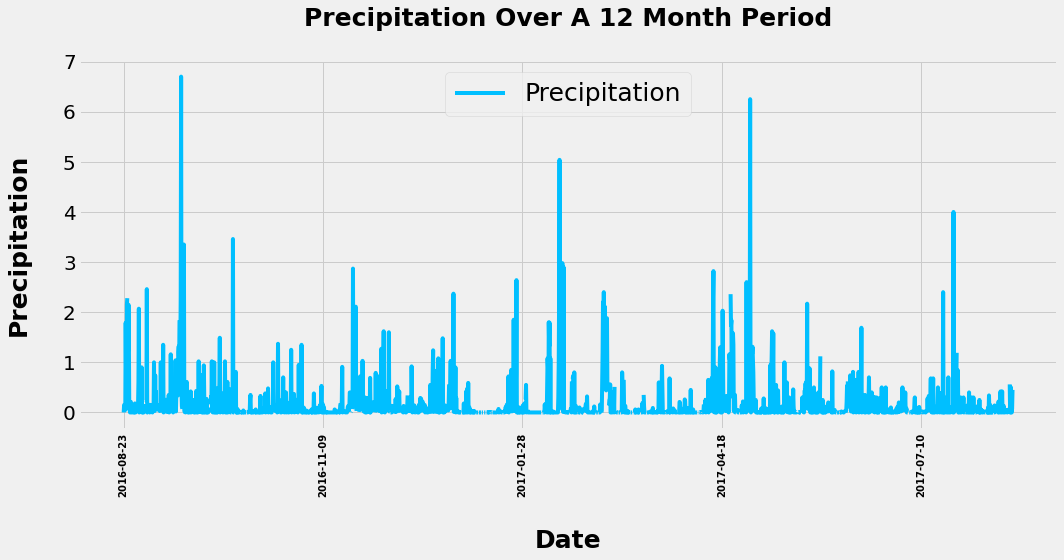

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data

plot_prcp_12 = precipitation_data.plot(figsize = (15, 8), color = 'deepskyblue', alpha = 1.0);

plot_prcp_12.set_xlabel("\nDate", weight="bold", size=25);
plot_prcp_12.set_ylabel("Precipitation\n", weight="bold", size=25);
plot_prcp_12.set_title("Precipitation Over A 12 Month Period\n", weight="bold", size=25);

# x_axis = prcp_12_data["Date"];
# tick_locations = [value for value in x_axis];
# plt.xticks(tick_locations, x_axis, rotation=90);

# Added after plot.legend()
plt.xticks(rotation=90, fontsize=10, weight="bold")
plt.yticks(fontsize=20)

# size doesn't work for .legend() change to fontsize
plt.legend(loc="upper center", fontsize=25)

# plot.grid()
plt.tight_layout()

plt.savefig("GRAPH_1_PRCP_OVER_LAST_12_MONTHS_.png")

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data

prcp_data_stats = precipitation_data.describe()

prcp_data_stats

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [20]:
# Design a query to show how many stations are available in this dataset?
# QUERY SOLUTUION

avaiable_stations = session.query(Station.name).count()

# avaiable_stations

print(f"---- THERE ARE [{avaiable_stations}] AVAILABLE STATIONS IN HAWAII ----")


---- THERE ARE [9] AVAILABLE STATIONS IN HAWAII ----


In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
count_of_stations = session.query(Measurement.station, Station.name,
                                  func.count(Measurement.station)).\
filter(Measurement.station == Station.station).\
group_by(Measurement.station)

active_stations = pd.DataFrame(data= count_of_stations, columns =["Station ID", "Station Name/Location", "Count of Active Stations"])

active_stations_data = active_stations.sort_values(by= "Count of Active Stations", ascending=False)

active_stations_data

,Station ID,Station Name/Location,Count of Active Stations
6,USC00519281,"WAIHEE 837.5, HI US",2772
7,USC00519397,"WAIKIKI 717.2, HI US",2724
1,USC00513117,"KANEOHE 838.1, HI US",2709
8,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
3,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
0,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
4,USC00517948,"PEARL CITY, HI US",1372
5,USC00518838,"UPPER WAHIAWA 874.3, HI US",511


In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 

# Lowest Temperature Recorded

lowest_temp = session.query(Measurement.station, Station.name, func.min(Measurement.tobs)).\
filter(Measurement.station==Station.station)

# lowest_temp[0]


# Highest Temperature Recorded

highest_temp = session.query(Measurement.station, Station.name, func.max(Measurement.tobs)).\
filter(Measurement.station==Station.station)

# highest_temp[0]

print(f"Lowest Temperature Recorded From Most Active Station: \nLocation of Station - {lowest_temp[0][1]}")
print(f"Station ID - {lowest_temp[0][0]}")
print(f"\nHighest Temperature Recorded From Most Active Station: \nLocation of Station - {highest_temp[0][1]}") 
print(f"Station ID - {highest_temp[0][0]}")


# Average Temperature

temp_max_active_station = session.query(Measurement.station, Station.name, func.avg(Measurement.tobs)).\
filter(Measurement.station==Station.station).\
group_by(Measurement.station).\
filter(Measurement.station == 'USC00519281')

# temp_max_active_station[0][1]
# temp_max_active_station[0][2]

avg_temp_highest_station = round(temp_max_active_station[0][2])

# avg_temp_highest_station

print(f"\nAverage Temperature Recorded From The Most Active Station: \n{avg_temp_highest_station} Degrees in Farenheit")

Lowest Temperature Recorded From Most Active Station: 
Location of Station - HONOLULU OBSERVATORY 702.2, HI US
Station ID - USC00511918

Highest Temperature Recorded From Most Active Station: 
Location of Station - WAIKIKI 717.2, HI US
Station ID - USC00519397

Average Temperature Recorded From The Most Active Station: 
72 Degrees in Farenheit


In [23]:
# Choose the station with the highest number of temperature observations.

tobs_over_12_months = session.query(Measurement.station, Station.name, Measurement.date, Measurement.tobs).\
filter(Measurement.station == Station.station).\
filter(Measurement.station == "USC00519281").\
filter(Measurement.date >= "2016-08-23").\
filter(Measurement.date <= "2017-08-23").\
order_by(Measurement.date).all()

In [24]:
# highest temperature recorded, and average temperature of the most active station?
highest_tobs_over_12_months = pd.DataFrame(tobs_over_12_months)

highest_tobs_over_12_months_df = highest_tobs_over_12_months.rename(columns={"station" : "Station", "name" : "Name", "date" : "Date", "tobs" : "Time of Observation Bias"})

highest_tobs_over_12_months_df.head(10)

,Station,Name,Date,Time of Observation Bias
0,USC00519281,"WAIHEE 837.5, HI US",2016-08-23,77.0
1,USC00519281,"WAIHEE 837.5, HI US",2016-08-24,77.0
2,USC00519281,"WAIHEE 837.5, HI US",2016-08-25,80.0
3,USC00519281,"WAIHEE 837.5, HI US",2016-08-26,80.0
4,USC00519281,"WAIHEE 837.5, HI US",2016-08-27,75.0
5,USC00519281,"WAIHEE 837.5, HI US",2016-08-28,73.0
6,USC00519281,"WAIHEE 837.5, HI US",2016-08-29,78.0
7,USC00519281,"WAIHEE 837.5, HI US",2016-08-30,77.0
8,USC00519281,"WAIHEE 837.5, HI US",2016-08-31,78.0
9,USC00519281,"WAIHEE 837.5, HI US",2016-09-01,80.0


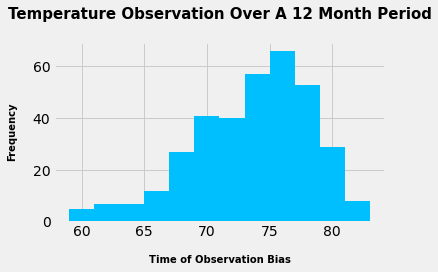

In [31]:

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# HIST Example

# plt.hist(clean_second_merge["Salary"], color='purple', alpha=1);

# plt.xlabel("\nSALARY RANGE ($)", weight="bold");
# plt.ylabel("NUMBER OF EMPLOYEES\n", weight="bold");
# plt.title("SALARY RANGE PER EMPLOYEES\n", weight="bold", size=15)

# plt.grid()
# plt.tight_layout()

# plt.savefig("Hist_By_Dept_Salaries_Range.png")

plt.hist(highest_tobs_over_12_months_df["Time of Observation Bias"],bins=12, color="deepskyblue", alpha=1.0);

plt.title("Temperature Observation Over A 12 Month Period\n", weight="bold", size=15);
plt.xlabel("\nTime of Observation Bias", weight="bold", size=10);
plt.ylabel("Frequency\n", weight="bold", size=10)

plt.tight_layout()

plt.savefig("GRAPH_2_TOBS_OVER_12_MONTHS_.png")

In [26]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))


[(62.0, 69.57142857142857, 74.0)]


## Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
## for your trip using the previous year's data for those same dates.


In [27]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
trip_date = (calc_temps("2016-08-23", "2017-08-23"))
print(f"Trip Dates [2016-08-23 to 2017-08-23]: {trip_date}")

trip_min = trip_date[0][0]
print(f"\nTrip Minimum Temperature: {trip_min} Farenheit")

trip_max = trip_date[0][1]
print(f"\nTrip Maximum Temperature: {round(trip_max)} Farenheit")

trip_average = trip_date[0][2]
print(f"\nTrip Average Temperature: {trip_average} Farenheit")

standard_error = (trip_max - trip_min)
print(f"\nStandard Error: {round(standard_error)} Farenheit")

Trip Dates [2016-08-23 to 2017-08-23]: [(58.0, 74.59058295964125, 87.0)]

Trip Minimum Temperature: 58.0 Farenheit

Trip Maximum Temperature: 75 Farenheit

Trip Average Temperature: 87.0 Farenheit

Standard Error: 17 Farenheit


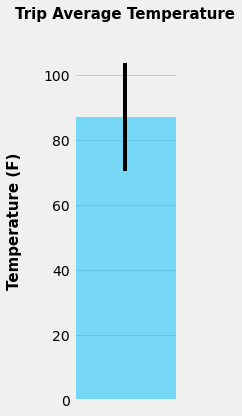

In [28]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
# Plot for "Trip Average Temperature -- Standard Error"
fig,ax3 = plt.subplots(figsize = (3,6))
ax3.set_ylabel("Temperature (F)\n", fontsize = 15, weight="bold")
ax3.set_title("Trip Average Temperature\n", fontsize = 15, weight="bold")
ax3.bar(0, trip_average, width=.10, alpha=.5, color='deepskyblue', yerr = standard_error)
ax3.set_xlim(0,5)
ax3.set_ylim(0,110)
ax3.set_xbound(lower=-0.05, upper=.05)
ax3.set_xticks([])
plt.tight_layout()
plt.savefig("GRAPH_3_TRIP_AVERAGE_TEMPERATURE_.png")


In [29]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [32]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = "2017-07-01"

end_date = "2017-07-14"

# Use the start and end date to create a range of dates
dates = session.query(Measurement.date).\
filter(Measurement.date >= start_date).\
filter(Measurement.date <= end_date).\
group_by(Measurement.date).all()

# Stip off the year and save a list of %m-%d strings
vacation_date_stip = [x[5:] for x in vacation_date]

first_vacation_date = vacation_date_stip[0]

last_vacation_date = vacation_date_stip[-1]

# Loop through the list of %m-%d strings and calculate the normals for each date
normals = [session.query(func.min(Measurement.tobs),
                         func.avg(Measurement.tobs),
                          func.max(Measurement.tobs)).filter(func.strftime("%m-%d", Measurement.date) >= first_vacation_date).filter(func.strftime("%m-%d", Measurement.date) <= last_vacation_date).group_by(func.strftime("%m-%d", Measurement.date)).all()]

NameError: name &#39;vacation_date&#39; is not defined

In [ ]:
normals = normals[0]

normals

In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df = pd.DataFrame(normals, columns=["Temperature_Min", "Temperature_Avg", "Temperature_Max"])
# normals_df

normals_df["date"] = vacation_date

normals_df["date"] = pd.to_datetime(normals_df["date"], format="%Y-%m-%d")

# normals_df.set_index("date", inplace=True)

normals_clean_df = normals_df.rename(columns={"date" : "Date"})

normals_clean_df.set_index("Date", inplace=True)

normals_clean_df

In [ ]:
# Plot the daily normals as an area plot with `stacked=False`

# Plot the daily normals as an area plot with `stacked=False`
normals_clean_df.plot(kind="area", alpha=0.5, stacked=False, x_compat=True, title="Daily Normals for Vacation Dates")

plt.tight_layout()